In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.500000,171471.442235,0.000,148498.250,296996.500,445494.750,593993.000
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
loan_paid_back,593994.0,0.798820,0.400883,0.000,1.000,1.000,1.000,1.000


In [18]:
df.isnull().sum()

id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [8]:
df['gender'].value_counts()

gender
Female    306175
Male      284091
Other       3728
Name: count, dtype: int64

In [14]:
df['loan_purpose'].value_counts()

loan_purpose
Debt consolidation    324695
Other                  63874
Car                    58108
Home                   44118
Education              36641
Business               35303
Medical                22806
Vacation                8449
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder

# Copy dataset
df_encoded = df.copy()

# Label encode categorical columns
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Get correlation with churn
corr = df_encoded.corr()['loan_paid_back'].sort_values(ascending=False)

# Display top and bottom correlations
print(corr)

loan_paid_back          1.000000
credit_score            0.234560
education_level         0.018781
annual_income           0.006326
id                      0.001387
marital_status         -0.000404
loan_purpose           -0.000973
loan_amount            -0.003762
gender                 -0.007356
interest_rate          -0.131184
grade_subgrade         -0.212376
debt_to_income_ratio   -0.335680
employment_status      -0.585304
Name: loan_paid_back, dtype: float64


In [23]:
df.drop(['id'], axis=1, inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 54.4+ MB


In [26]:
df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [27]:
df['loan_paid_back'].value_counts(normalize=True)

loan_paid_back
1.0    0.79882
0.0    0.20118
Name: proportion, dtype: float64

In [28]:
df['loan_paid_back'].value_counts()

loan_paid_back
1.0    474494
0.0    119500
Name: count, dtype: int64

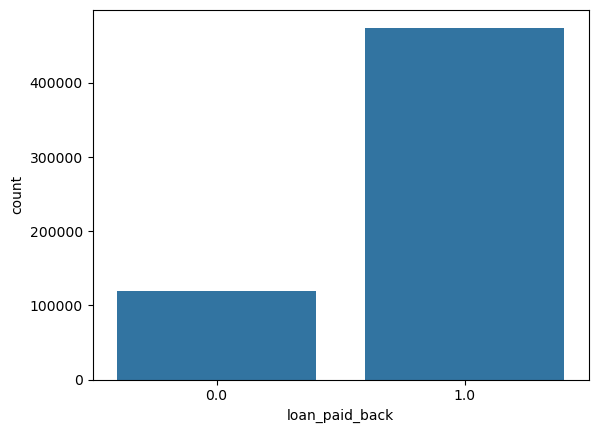

In [32]:
sns.countplot(x='loan_paid_back', data=df)
plt.show()

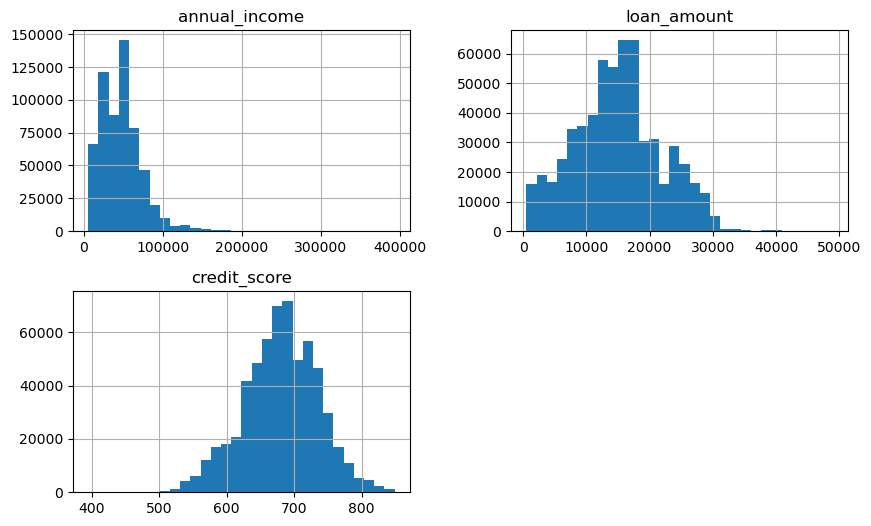

In [29]:
df.hist(['annual_income', 'loan_amount', 'credit_score'], bins=30, figsize=(10, 6))
plt.show()

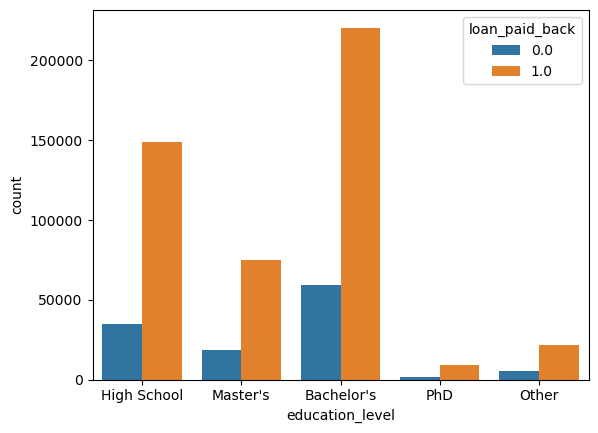

In [34]:
sns.countplot(data=df, x='education_level', hue='loan_paid_back')
plt.show()

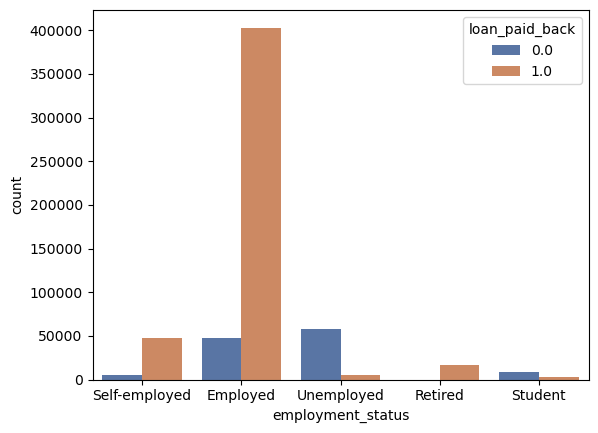

In [35]:
sns.countplot(data=df, x='employment_status', hue='loan_paid_back', palette='deep')
plt.show()

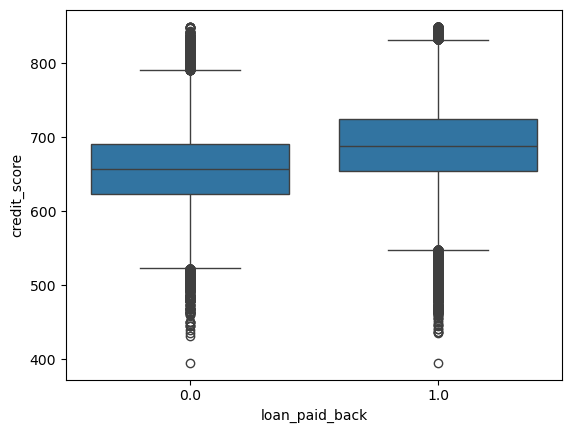

In [38]:
sns.boxplot(x='loan_paid_back', y='credit_score', data=df)
plt.show()

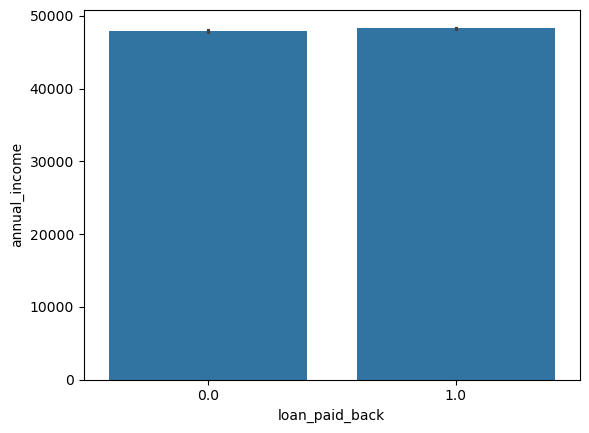

In [41]:
sns.barplot(x='loan_paid_back', y='annual_income', data=df)
plt.show()

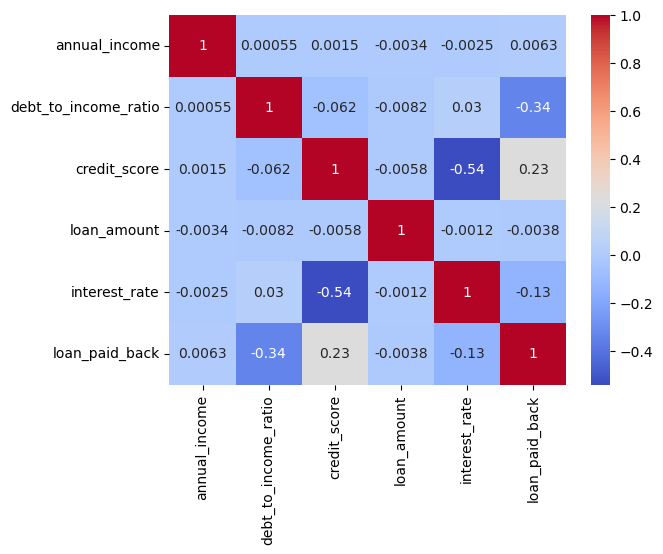

In [42]:
corr = df[['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate', 'loan_paid_back']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [43]:
df['HighDebt'] = (df['debt_to_income_ratio'] > 0.4).astype(int)

In [44]:
df['LoanToIncome'] = df['loan_amount'] / df['annual_income']

In [45]:
df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back,HighDebt,LoanToIncome
0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0,0,0.086094
1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0,0,0.207757
2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0,0,0.343080
3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0,0,0.099929
4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0,0,0.477883


In [50]:
X = df.drop('loan_paid_back', axis = 1)
y = df['loan_paid_back']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [54]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

In [55]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),                  
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)  
    ]
)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [57]:
log_reg = LogisticRegression()

In [58]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])

In [59]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'HighDebt', 'LoanToIncome'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

In [60]:
import joblib

In [61]:
joblib.dump(model, 'rf=model.pkl')
joblib.dump(preprocessor, 'rf=preproceesor.pkl')

['rf=preproceesor.pkl']

In [62]:
predictions = model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [64]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

Accuracy: 0.9002126835728596

Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.61      0.71     35748
         1.0       0.91      0.97      0.94    142451

    accuracy                           0.90    178199
   macro avg       0.88      0.79      0.82    178199
weighted avg       0.90      0.90      0.89    178199


Confusion Matrix:
 [[ 21723  14025]
 [  3757 138694]]


In [65]:
from sklearn.metrics import roc_curve, auc

In [66]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

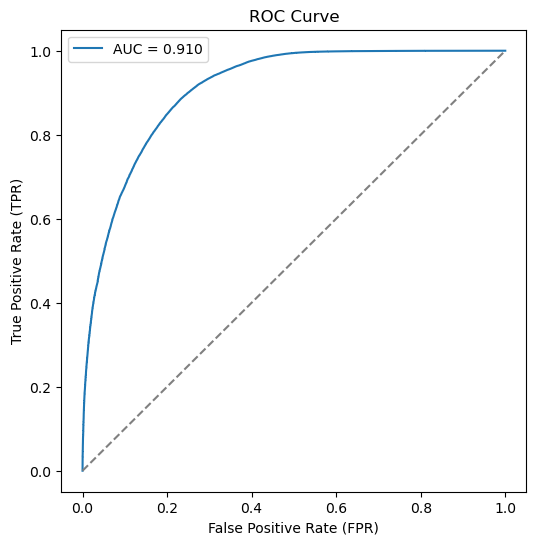

In [67]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import roc_auc_score
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

AUC Score: 0.9095388382468885
